# This uses the movielens 100k dataset

In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
column_names = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("ml-100k/u.data", sep="\t", names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape

(100000, 4)

In [6]:
df["user_id"].nunique()

943

In [7]:
df["item_id"].nunique()

1682

In [8]:
movies = pd.read_csv("ml-100k/u.item", sep="|", header=None, encoding="ISO-8859-1")

In [9]:
movies.head()
movies = movies[[0, 1]]
movies.columns = ["item_id", "title"]

In [10]:
movies

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [11]:
df = pd.merge(df, movies, on="item_id")

In [12]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,880,476,3,880175444,"First Wives Club, The (1996)"
99996,716,204,5,879795543,Back to the Future (1985)
99997,276,1090,1,874795795,Sliver (1993)
99998,13,225,2,882399156,101 Dalmatians (1996)
99999,12,203,3,879959583,Unforgiven (1992)


## Exploratory Data Analysis

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

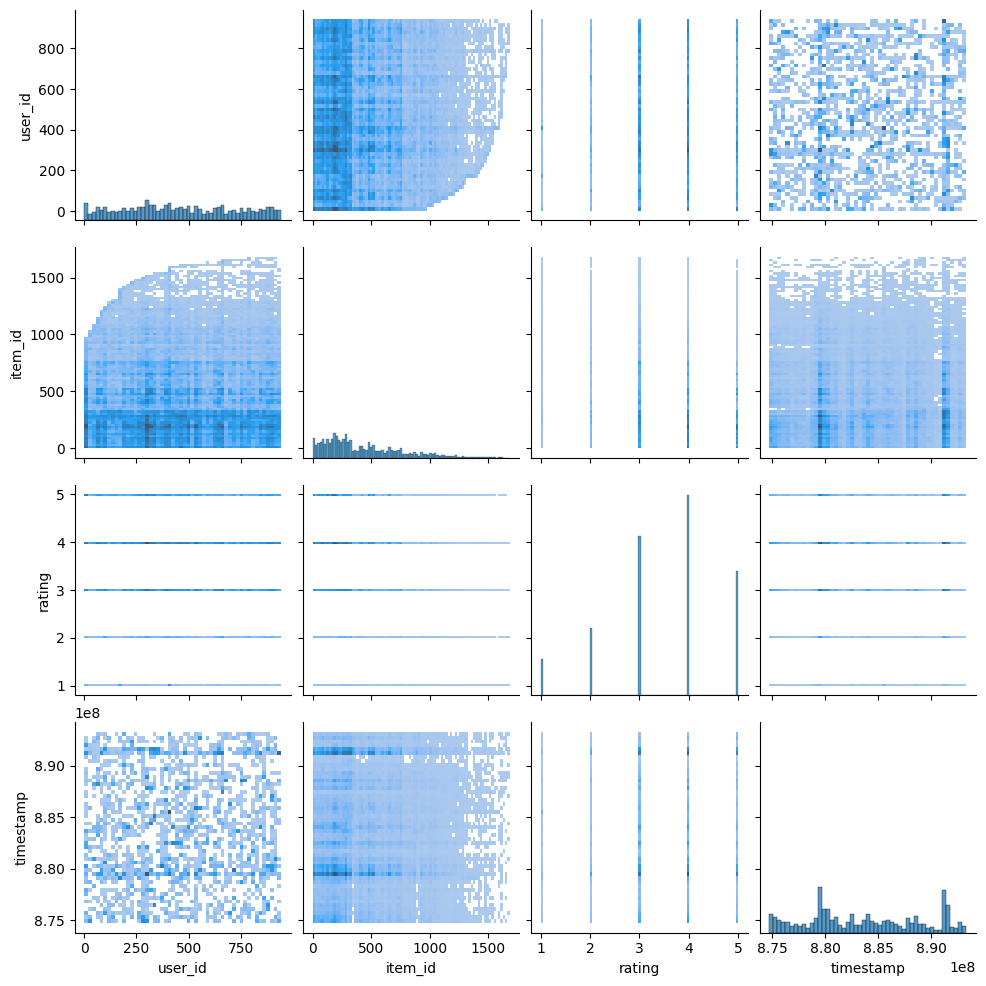

In [14]:
sns.pairplot(df, kind="hist")

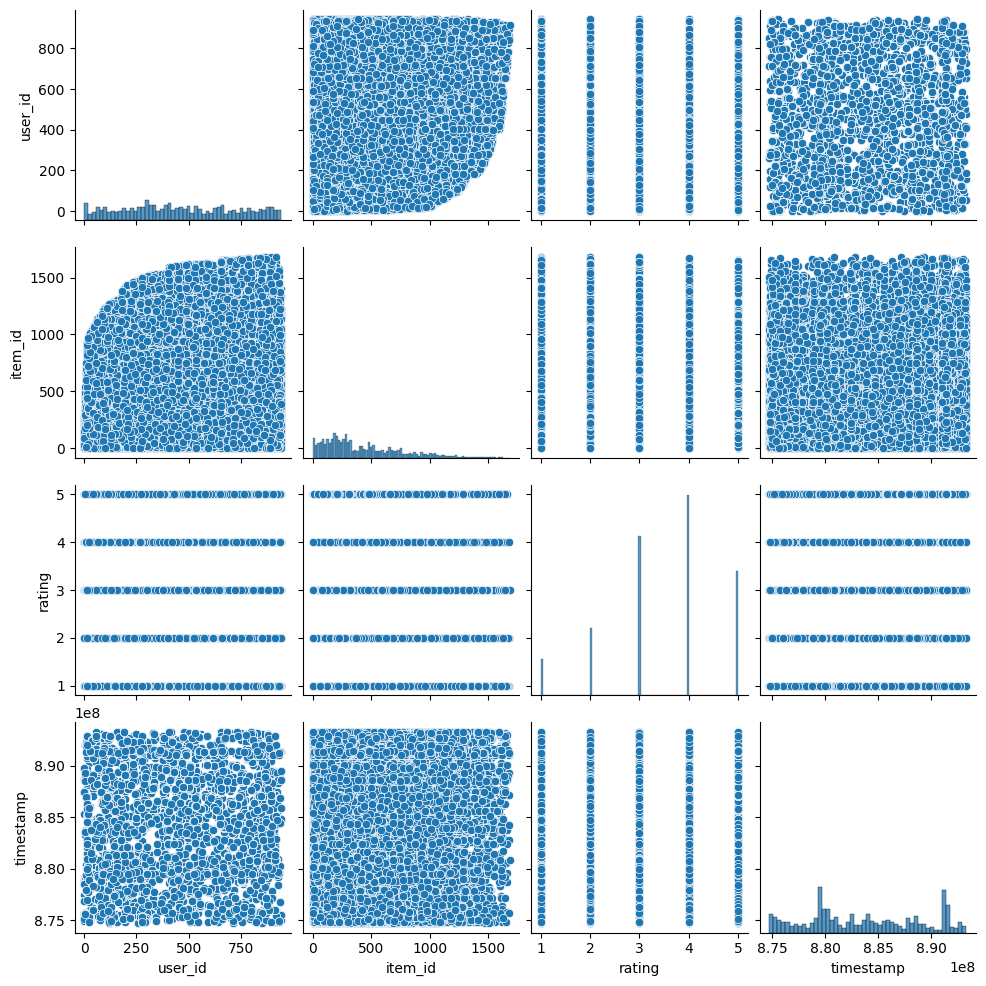

In [15]:
sns.pairplot(df, kind="scatter")

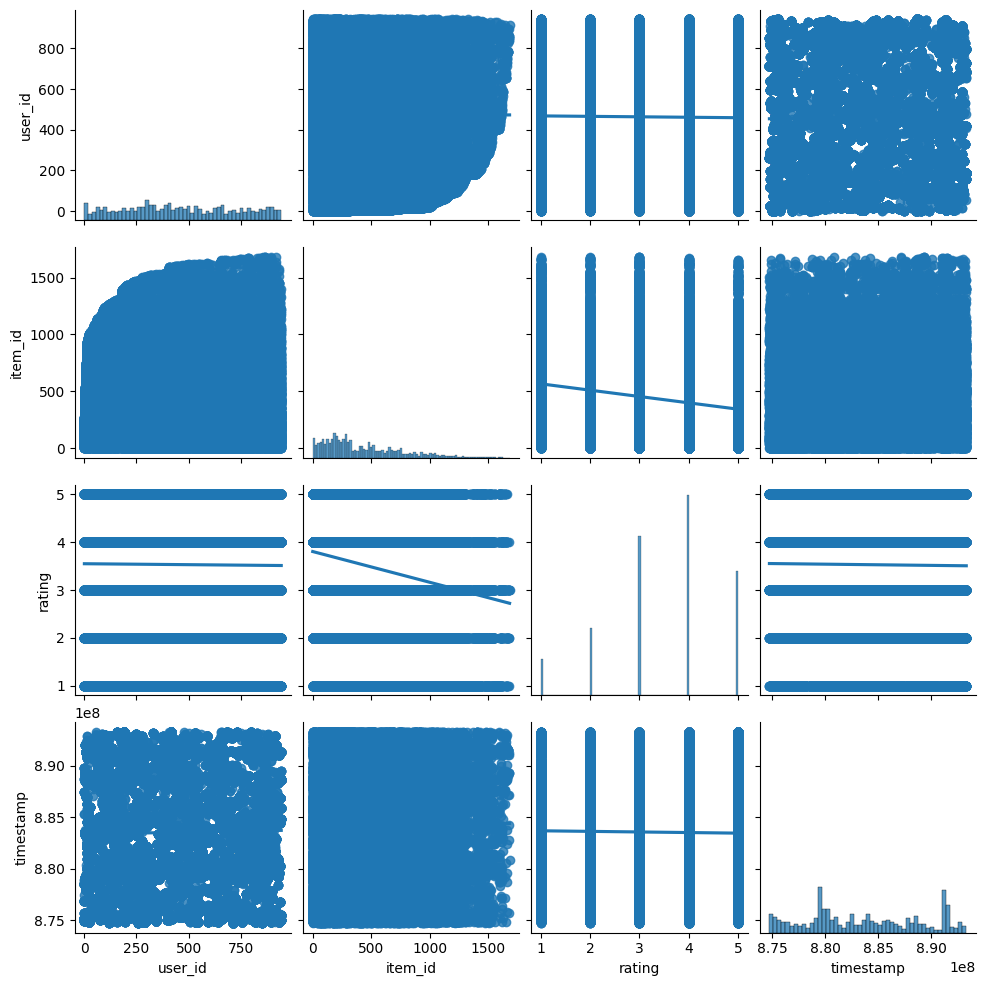

In [16]:
sns.pairplot(df, kind="reg")

In [35]:
ratings = pd.DataFrame(df.groupby('title')["rating"].mean())

In [36]:
count = pd.DataFrame(df.groupby('title')["rating"].count())

In [41]:
ratings["num of ratings"] = pd.DataFrame(df.groupby('title').count()['rating'])

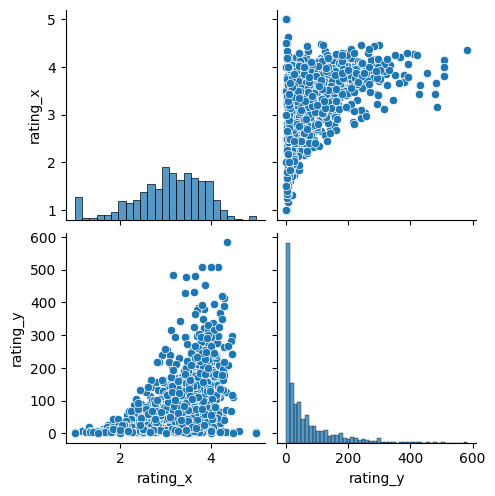

In [42]:
sns.pairplot(movies)

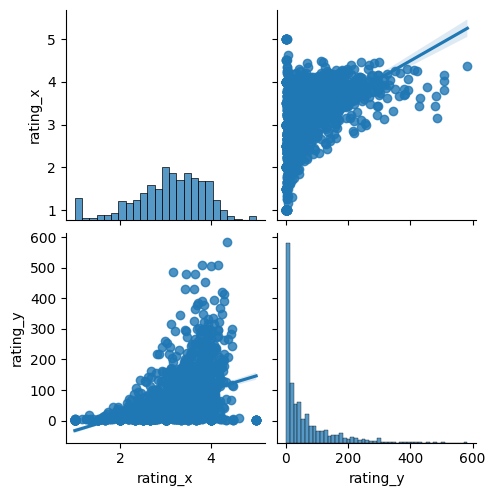

In [25]:
sns.pairplot(movies, kind="reg")

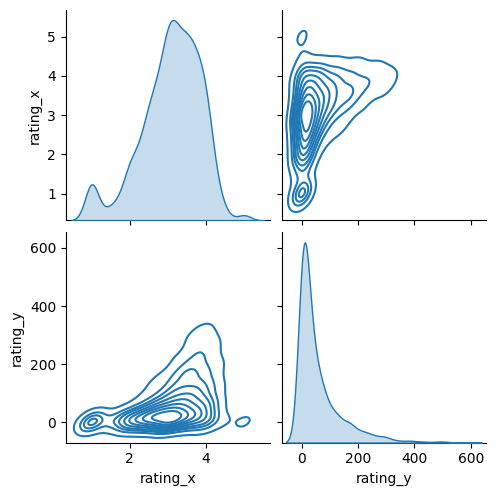

In [26]:
sns.pairplot(movies, kind="kde")

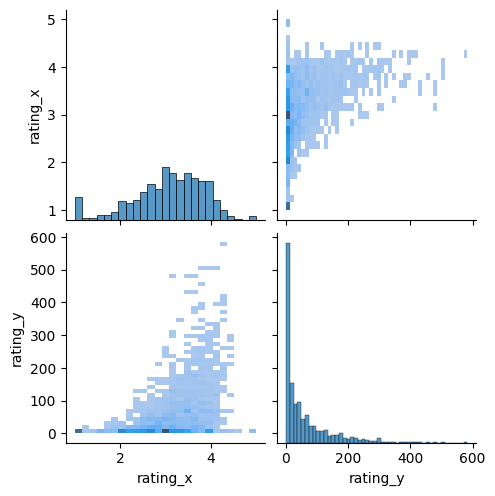

In [27]:
sns.pairplot(movies, kind="hist")

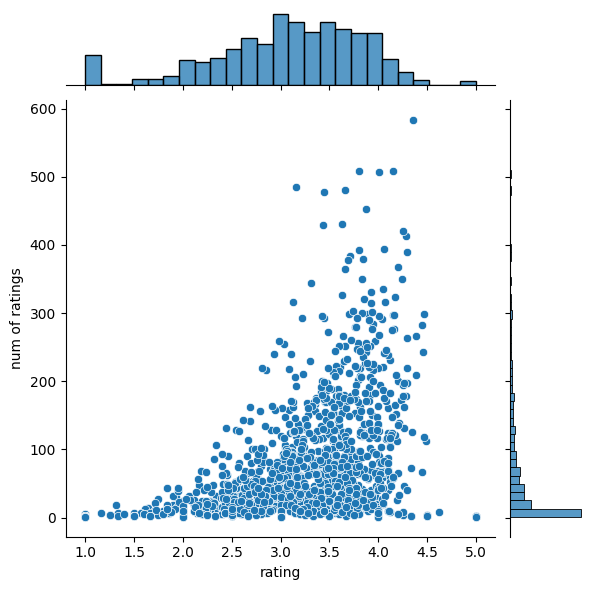

In [43]:
sns.jointplot(x = "rating", y="num of ratings", data=ratings)

In [45]:
ratings.sort_values(by="rating", ascending=False)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


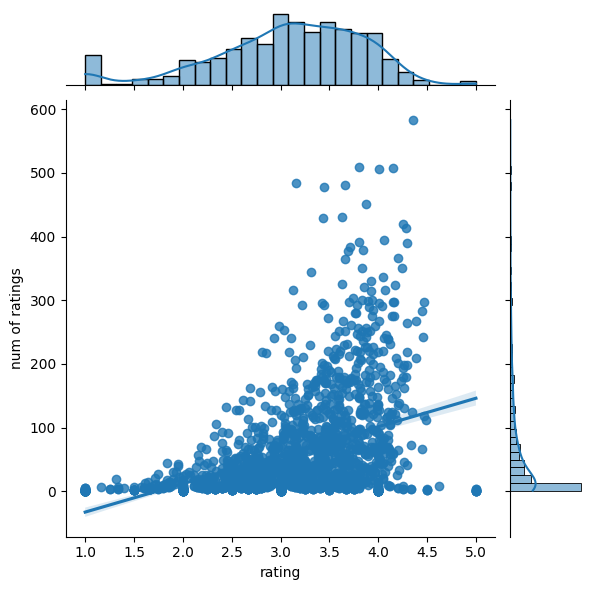

In [46]:
sns.jointplot(x = "rating", y="num of ratings", data=ratings, kind="reg")

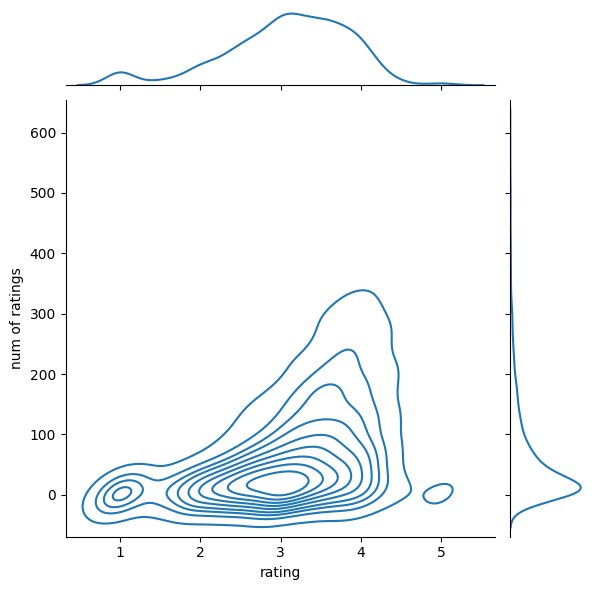

In [47]:
sns.jointplot(x = "rating", y="num of ratings", data=ratings, kind="kde")

In [51]:
moviemat = df.pivot_table(index="user_id", columns="title", values="rating")

In [52]:
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
starwars_user_ratings = moviemat["Star Wars (1977)"]
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [54]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

In [55]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])

In [58]:
corr_starwars.dropna(inplace=True)

In [59]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [60]:
corr_starwars.sort_values(by="Correlation", ascending=False)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [61]:
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [63]:
corr_starwars = corr_starwars.join(ratings["num of ratings"])

In [68]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values(by="Correlation", ascending=False)[1:]

,Correlation,num of ratings
title,,
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [71]:
def predict_movie(movie_name):
    movie_user_ratings = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    corr_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie.join(ratings['num of ratings'])
    predictions = corr_movie[corr_movie['num of ratings']>100].sort_values(by="Correlation", ascending=False)[1:]
    return predictions

In [72]:
predict_movie("Titanic (1997)")

,Correlation,num of ratings
title,,
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
William Shakespeare's Romeo and Juliet (1996),0.430243,106
...,...,...
Raging Bull (1980),-0.223660,116
Jackie Brown (1997),-0.236841,126
Brazil (1985),-0.243532,208
